In [85]:
import pandas as pd
df = pd.read_csv('Survived.csv')
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [86]:
df2 = df.drop(columns = ['PassengerId','Ticket','Cabin','Embarked'])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [87]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [88]:
df3 = df2.fillna(df2.mean(numeric_only=True))

In [89]:
dummied_sex = pd.get_dummies(df3['Sex'], dtype=int, drop_first=True)

In [90]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [91]:
dummied_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [92]:
df4 = pd.concat([df3,dummied_sex], axis=1)
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,22.000000,1,0,7.2500,1
1,1,1,female,38.000000,1,0,71.2833,0
2,1,3,female,26.000000,0,0,7.9250,0
3,1,1,female,35.000000,1,0,53.1000,0
4,0,3,male,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,1
887,1,1,female,19.000000,0,0,30.0000,0
888,0,3,female,29.699118,1,2,23.4500,0
889,1,1,male,26.000000,0,0,30.0000,1


In [93]:
from sklearn.covariance import MinCovDet
mcd = MinCovDet(random_state=0, support_fraction=0.7)
df4 = df4.drop(columns='Sex')
df4.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0


In [96]:
mcd.fit(df4)
distance = mcd.mahalanobis(df4)
distance = pd.Series(distance)
tmp = distance.describe()
tmp

count     891.000000
mean       35.717377
std       167.244089
min         1.222813
25%         2.700145
50%         7.214475
75%        14.398815
max      2659.310776
dtype: float64

In [99]:
iqr = tmp['75%']-tmp['25%']
jogen = tmp['75%']+iqr*1.5
kagen = tmp['25%']-iqr*1.5
drop = distance[(distance>jogen) | (distance<kagen)].index

In [105]:
df4.shape

(891, 7)

In [100]:
df5 = df4.drop(drop)

In [104]:
df5.shape

(762, 7)

In [106]:
df5.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [111]:
from sklearn.preprocessing import StandardScaler
sc_model = StandardScaler()
sc_df = sc_model.fit_transform(df5)
sc_df = pd.DataFrame(sc_df, columns=df5.columns)
sc_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,-0.766485,0.794411,-0.673215,1.407930,-0.417489,-0.670927,0.69254
1,1.304656,-1.717378,0.604128,1.407930,-0.417489,2.688457,-1.44396
2,1.304656,0.794411,-0.353879,-0.571484,-0.417489,-0.635514,-1.44396
3,1.304656,-1.717378,0.364626,1.407930,-0.417489,1.734505,-1.44396
4,-0.766485,0.794411,0.364626,-0.571484,-0.417489,-0.628956,0.69254
...,...,...,...,...,...,...,...
757,-0.766485,-0.461484,-0.274045,-0.571484,-0.417489,-0.369264,0.69254
758,1.304656,-1.717378,-0.912717,-0.571484,-0.417489,0.522608,-1.44396
759,-0.766485,0.794411,-0.058564,1.407930,3.177161,0.178975,-1.44396
760,1.304656,-1.717378,-0.353879,-0.571484,-0.417489,0.522608,0.69254


In [125]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
model.fit(sc_df)
clastered=pd.DataFrame(model.labels_, columns=['claster'])
clastered

,claster
0,1
1,0
2,2
3,0
4,1
...,...
757,1
758,2
759,2
760,0


In [127]:
df_clas = pd.concat([sc_df,clastered], axis=1)

<Axes: xlabel='claster'>

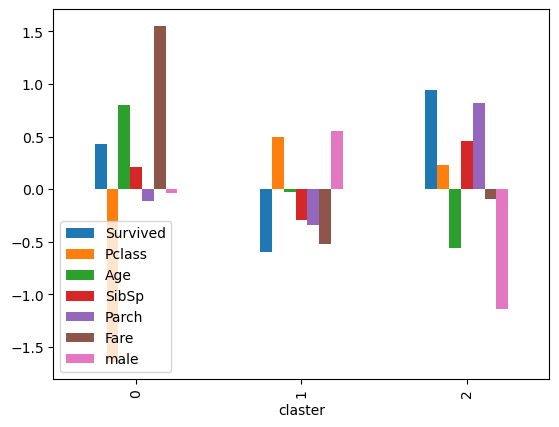

In [130]:
df_clas.groupby('claster').mean().plot(kind='bar')